In [1]:
# make modules in parent directory importable 
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from utility import named_tuple
args = named_tuple({'fasta_file': '../data/sequences/human_g1k_v37.fasta', 
                    'chromosome_number': 22,
                    'depth_file_name': '../data/depths/100.multicov.int32.bin',
                    'window_half_width': 500})

from load_preprocess_data import create_basic_dataframe
data = create_basic_dataframe(args)

def filter2(data):
    return data[(data['start'] >= 0) &
                (data['end'] < len(data))]
data = filter2(data)

from load_preprocess_data import read_fasta
chromosome = read_fasta(args)

def compute_fraction_of_Ns(sequence): 
    return sequence.count('N')/float(len(sequence))
data['fraction_of_Ns'] = [compute_fraction_of_Ns(chromosome[s:e]) for s, e in zip(data['start'], data['end'])]

/anaconda2/envs/tensorflow3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5,0,'genomic position')

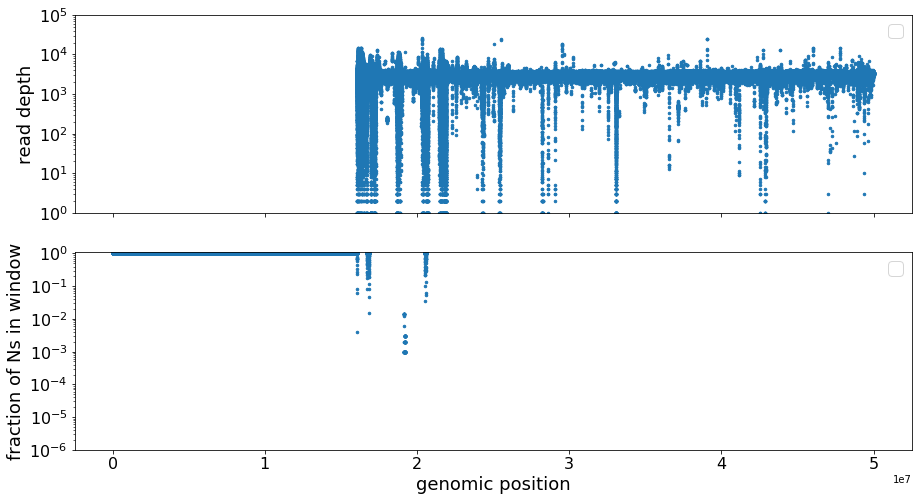

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 

from plot import format_fig, format_axis
figure, axes = plt.subplots(2, 1, sharex=True)
format_fig(figure, height=8)

import numpy as np
def plot_depth_profile(axis, values, region, size, ylabel, ylim=None):
    import re
    chromosome, start, end = re.split(':|-', region)
    assert(int(chromosome) == 22)    
    sampled_positions = np.random.choice(np.arange(int(start), int(end), dtype=int), size=size, replace=False)
    sampled_values = values[sampled_positions]
    axis.semilogy(sampled_positions, sampled_values, '.', ms=5)
    axis.set_ylabel(ylabel)
    if ylim:
        axis.set_ylim(ylim)
    format_axis(axis)

region = '22:0:50000000'
size = 1000000
plot_depth_profile(axes[0], data['observed_depth'].values, region, size, ylabel='read depth', ylim=[0, 100000])
plot_depth_profile(axes[1], data['fraction_of_Ns'].values, region, size, ylabel='fraction of Ns in window', ylim=[0.000001, 1.1])
axes[1].set_xlabel('genomic position')